In [49]:
from sklearn.datasets import load_digits
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
digits = load_digits()
x = digits.data
y = digits.target
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
classifier = GaussianNB()
from sklearn.grid_search import GridSearchCV
y_score = classifier.fit(X_train, y_train.argmax(axis=1))
y_score1 = y_score.predict_proba(X_test)
y_score = y_score.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score1[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#print(X_train.shape, y_score.shape)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc[0]

1.0

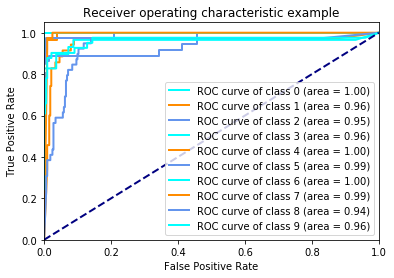

In [50]:
import matplotlib.pyplot as plt
from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(x, digits.target, test_size=.2, random_state=0)
y_score = classifier.fit(X_train, y_train).predict(X_test)
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, y_score))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.66      0.89      0.76        35
          2       0.94      0.47      0.63        36
          3       0.89      0.83      0.86        29
          4       1.00      0.73      0.85        30
          5       0.97      0.88      0.92        40
          6       1.00      1.00      1.00        44
          7       0.74      1.00      0.85        39
          8       0.54      0.82      0.65        39
          9       0.96      0.63      0.76        41

avg / total       0.87      0.82      0.83       360




In [57]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_score)
print(matrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  4  0]
 [ 0  7 17  0  0  0  0  0 12  0]
 [ 0  0  1 24  0  0  0  0  4  0]
 [ 0  1  0  0 22  0  0  7  0  0]
 [ 0  1  0  0  0 35  0  3  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  5  0  0  0  1  0  1 32  0]
 [ 0  2  0  3  0  0  0  3  7 26]]


In [58]:
score = classifier.score(X_test, y_test)
print(score)

0.825
